<a href="https://colab.research.google.com/github/Saim-Hassan786/LangGraph-Function-Tool-Calling-Calculator-Project/blob/main/LangGraph_Function_Tool_Calling_Calculator_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The provided code installs the necessary libraries: `langchain-google-genai`, `langchain`, and `langgraph`, which are crucial for integrating Google’s Gemini AI model, handling language chains, and managing graph-based workflows. The `langchain-google-genai` package provides tools to interface with Google's generative AI models, while `langchain` helps build complex pipelines and chains for NLP tasks. The `langgraph` library is used for graph-based logic, enabling the creation of decision-making workflows and integrating various tools within the process. Together, these libraries allow you to build and execute sophisticated AI-driven workflows, combining natural language processing with custom tool interactions. The `pip install -q -U` commands ensure that the libraries are installed or updated to their latest versions.

In [ ]:
!pip install -q -U langchain-google-genai
!pip install -q -U langchain
!pip install -q -U  langgraph
!pip install -q -U langchain_community
!pip install -q -U tavily_python

In [ ]:
from google.colab import userdata
import os

os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

In [ ]:
from google.colab import userdata
os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

In [ ]:
from langgraph.graph import StateGraph , START, END, MessagesState
from langchain_core.messages import AIMessage,SystemMessage,HumanMessage
from langgraph.prebuilt import ToolNode,tools_condition
from langgraph.graph.state import CompiledStateGraph
from langchain.tools import Tool
from langchain_core.tools import tool

The code initializes a connection to Google's Gemini AI model using the `langchain_google_genai` library. The `ChatGoogleGenerativeAI` class is used to create an instance of the AI model, specifying the model version (`gemini-2.0-flash-exp`) and an API key stored in the environment variable `GOOGLE_API_KEY` for authentication. The `temperature` parameter is set to 0.5, which controls the randomness of the AI's responses, where lower values make the model more deterministic. This setup allows you to interact with the Gemini AI model for generating natural language responses. The code ensures the model can be queried with specific configurations for tasks requiring generative AI capabilities.

In [ ]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(
    model="gemini-2.0-flash-exp",
    api_key=os.environ["GOOGLE_API_KEY"],
    temperature=0.5
)

# Defining Simple Functions of Addition, Subtraction, Multiplication, Division

In [ ]:
@tool
def add(a:int,b:int)->int:
  """
  This function is used to Add two number

  Args
  a:int
  b:int

  return a+b
  """
  return a+b

@tool
def subtract(a:int,b:int)->int:
  """
  This function is used to subtract two numbers

  Agrs
  a:int
  b:int

  return a-b
  """
  return a-b

@tool
def multiply(a:int,b:int)->int:
  """
  This function is used to multiply two numbers

  Args
  a:int
  b:int

  return a*b
  """
  return a*b

@tool
def divide(a:int,b:int)->int:
  """
  This function is used to divide two numbers

  Args
  a:int
  b:int

  return a/b
  """
  return a/b

In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults
from typing import Any, Dict

@tool
def tavily_search_result(query) -> Dict[str, Any]:
  """
  Use the TavilySearchTool to perform a web search and return relevant results.

    This function takes a user query and utilizes the TavilySearchTool to search the web
    for relevant information. The function is designed to handle queries where the user
    is seeking information available on the internet. It returns a limited number of results
    from the web based on the provided query.

    Parameters:
    query (str): The search query input by the user. This could be any string that represents
                 the user's information need.

    Returns:
    list: A list of search results relevant to the query. The results are returned as a
          collection of URLs or snippets from the web, limited to a predefined number
          (e.g., 2 results).

  """
  tavily_search = TavilySearchResults(max_results=2)
  return tavily_search.run(query)

The code creates a list called `tools`, which contains four functions: `add`, `subtract`, `multiply`,`divide` and **tavily_search as well**, each performing basic arithmetic operations. The `llm.bind_tools(tools)` method binds these tools to the previously initialized language model (`llm`). This allows the AI model to use these tools for performing mathematical operations when invoked, integrating external functionality with the generative AI model. The result is that the model can respond to queries that involve calculations by leveraging the specified tools. This setup enhances the AI's capabilities by enabling it to handle both natural language processing and mathematical tasks seamlessly.

In [ ]:
# tools = [
#     Tool(name="addition", func=add, description="This tool is used to add two numbers. Input should be in the format 'a b' where a and b are the numbers to be added."),
#     Tool(name="subtraction", func=subtract, description="This tool is used to subtract two numbers. Input should be in the format 'a b' where a and b are the numbers to be subtracted."),
#     Tool(name="multiplication", func=multiply, description="This tool is used to multiply two numbers. Input should be in the format 'a b' where a and b are the numbers to be multiplied."),
#     Tool(name="division", func=divide, description="This tool is used to divide two numbers. Input should be in the format 'a b' where a and b are the numbers to be divided."),
#     Tool(name="tavily_search", func=tavily_search_result, description="This tool is used to search the web using Tavily. Input should be a search query.")
# ]
# llm_with_tools = llm.bind_tools(tools)

In [ ]:
tools_1 = [add,subtract,multiply,divide]
tools_2 = [Tool(name="tavily_search", func=tavily_search_result, description="This tool is used to search the web using Tavily. Input should be a search query.")]

tool_all = tools_1 + tools_2

llm_with_tools = llm.bind_tools(tool_all)

The code imports necessary components from the `langgraph` and `langchain_core` libraries to build and manage a state-based workflow for AI interactions. `StateGraph` is used to define a directed graph that represents the flow of states in the system, with `START` and `END` as the key entry and exit points. The `MessagesState` class handles the structure for storing messages exchanged during the interaction. `ToolNode` and `tools_condition` are prebuilt utilities for integrating external tools into the state graph and defining conditions for triggering tool-based actions. Finally, the `CompiledStateGraph` class compiles the graph into a runnable structure, allowing for dynamic decision-making and tool invocation based on state transitions.

The function `llm_with_tools_power` takes in a `MessagesState` object, which contains the state of the conversation or interaction. It accesses the messages in the state by using `state["messages"]`. The function then invokes the `llm_with_tools` object, which has been bound to perform specific tool-based actions, passing the messages as input to it. The result of invoking the tools is wrapped in a dictionary with the key `"messages"`, which represents the updated conversation state. This allows the system to process the input messages, apply tool-based logic, and return the modified messages as the output of the function.

In [ ]:
def llm_with_tools_power(state:MessagesState)->MessagesState:
  response = llm_with_tools.invoke(state["messages"])
  return {"messages":[response]}

The code defines a state graph using a builder pattern, where nodes represent different states and edges define the transitions between them. It adds two nodes: "llm_with_tool_power" associated with a state and action (llm_with_tools_power) and "tools" linked to a set of tools (ToolNode). Conditional edges are created between these nodes based on a condition ("tools_condition"). The edges define the flow between the nodes, with one starting from the initial state (START) and another allowing for a return from "tools" to "llm_with_tool_power." Finally, the graph is compiled into a "CompiledStateGraph" instance for execution.

In [ ]:
builder = StateGraph(state_schema=MessagesState)

builder.add_node("llm_with_tool_power",llm_with_tools_power)
builder.add_node("tools",ToolNode(tool_all))

builder.add_edge(START,"llm_with_tool_power")
builder.add_conditional_edges("llm_with_tool_power",tools_condition)
builder.add_edge("tools","llm_with_tool_power")

graph : CompiledStateGraph = builder.compile()

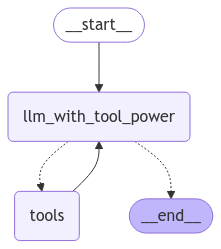

In [ ]:
from IPython.display import display, Markdown, Image
display(Image(graph.get_graph().draw_mermaid_png()))

# Below are the responses from the above graph created

In [ ]:
response_1 = graph.invoke({"messages":[HumanMessage(content="Add 2 + 3")]})
for r in response_1["messages"]:
  r.pretty_print()

================================ Human Message =================================

Add 2 + 3
================================== Ai Message ==================================
Tool Calls:
  add (8e8d7425-bc0a-4e79-a6e5-a6cd47072f12)
 Call ID: 8e8d7425-bc0a-4e79-a6e5-a6cd47072f12
  Args:
    a: 2.0
    b: 3.0
================================= Tool Message =================================
Name: add

5
================================== Ai Message ==================================

The sum of 2 and 3 is 5.


In [ ]:
response_2 = graph.invoke({"messages":[HumanMessage(content="Subtract 20 and 10")]})
for r in response_2["messages"]:
  r.pretty_print()

================================ Human Message =================================

Subtract 20 and 10
================================== Ai Message ==================================
Tool Calls:
  subtract (585bc660-fcd5-4068-9dd8-47c369ef74a9)
 Call ID: 585bc660-fcd5-4068-9dd8-47c369ef74a9
  Args:
    a: 20.0
    b: 10.0
================================= Tool Message =================================
Name: subtract

10
================================== Ai Message ==================================

The result of subtracting 10 from 20 is 10.


In [ ]:
response_3 = graph.invoke({"messages":[HumanMessage(content="Multiply 5 by 15")]})
for r in response_3["messages"]:
  r.pretty_print()

================================ Human Message =================================

Multiply 5 by 15
================================== Ai Message ==================================
Tool Calls:
  multiply (11ea43de-4fb2-4772-af96-5079e64f3014)
 Call ID: 11ea43de-4fb2-4772-af96-5079e64f3014
  Args:
    a: 5.0
    b: 15.0
================================= Tool Message =================================
Name: multiply

75
================================== Ai Message ==================================

The result of multiplying 5 by 15 is 75.


In [ ]:
response_4 = graph.invoke({"messages":[HumanMessage(content="Divide 20 and 2")]})
for r in response_4["messages"]:
  r.pretty_print()

================================ Human Message =================================

Divide 20 and 2
================================== Ai Message ==================================
Tool Calls:
  divide (723f2d58-b43c-4201-83e1-b3b936ebd17c)
 Call ID: 723f2d58-b43c-4201-83e1-b3b936ebd17c
  Args:
    a: 20.0
    b: 2.0
================================= Tool Message =================================
Name: divide

10.0
================================== Ai Message ==================================

The result of dividing 20 by 2 is 10.


In [ ]:
response_5 = graph.invoke({"messages":[HumanMessage(content="Add 10 into 5 and then multiply result by 5")]})
for r in response_5["messages"]:
  r.pretty_print()

================================ Human Message =================================

Add 10 into 5 and then multiply result by 5
================================== Ai Message ==================================
Tool Calls:
  add (8bf65789-0750-45f0-bf78-1d619ef6cc44)
 Call ID: 8bf65789-0750-45f0-bf78-1d619ef6cc44
  Args:
    a: 10.0
    b: 5.0
================================= Tool Message =================================
Name: add

15
================================== Ai Message ==================================
Tool Calls:
  multiply (8e4c3a91-dfe7-4a2a-ac79-79185df5699e)
 Call ID: 8e4c3a91-dfe7-4a2a-ac79-79185df5699e
  Args:
    a: 15.0
    b: 5.0
================================= Tool Message =================================
Name: multiply

75
================================== Ai Message ==================================

The result of adding 10 and 5 is 15, and then multiplying by 5 is 75.


In [ ]:
response_6 = graph.invoke({"messages":[HumanMessage(content="What is the Weather in New York Today")]})
for r in response_6["messages"]:
  r.pretty_print()

================================ Human Message =================================

What is the Weather in New York Today
================================== Ai Message ==================================
Tool Calls:
  tavily_search (e9beec2e-01aa-4847-8719-783c1ec256b7)
 Call ID: e9beec2e-01aa-4847-8719-783c1ec256b7
  Args:
    __arg1: Weather in New York Today
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://weather.com/weather/today/l/96f2f84af9a5f5d452eb0574d4e4d8a840c71b05e22264ebdc0056433a642c84", "content": "Weather Forecast and Conditions for New York City, NY - The Weather Channel | Weather.com Weather Forecasts Today's Forecast for New York City, NY ### Afternoon 65° Chance of Rain0% ### Evening 55° Chance of Rain1% Weather Today in New York City, NY Weather Pattern Change And Snowy Forecast Hourly Forecast ### Now 66° Chance of Rain0% ### 2 pm 66° Chance of Rain0% ### 3 pm 66° Chance of Rain0% ### 4 pm 65° Ch

In [ ]:
response_7 = graph.invoke({"messages":[HumanMessage(content="What is the Weather in Lahore Today")]})
for r in response_7["messages"]:
  r.pretty_print()

================================ Human Message =================================

What is the Weather in Lahore Today
================================== Ai Message ==================================
Tool Calls:
  tavily_search (303f154e-4fbc-4d6c-a156-9782624eff9e)
 Call ID: 303f154e-4fbc-4d6c-a156-9782624eff9e
  Args:
    __arg1: Weather in Lahore Today
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://www.weatherapi.com/", "content": "{'location': {'name': 'Lahore', 'region': 'Punjab', 'country': 'Pakistan', 'lat': 31.5497, 'lon': 74.3436, 'tz_id': 'Asia/Karachi', 'localtime_epoch': 1736763974, 'localtime': '2025-01-13 15:26'}, 'current': {'last_updated_epoch': 1736763300, 'last_updated': '2025-01-13 15:15', 'temp_c': 20.2, 'temp_f': 68.4, 'is_day': 1, 'condition': {'text': 'Mist', 'icon': '//cdn.weatherapi.com/weather/64x64/day/143.png', 'code': 1030}, 'wind_mph': 7.4, 'wind_kph': 11.9, 'wind_degree': 321, 'wind_d

In [ ]:
response_8 = graph.invoke({"messages":[HumanMessage(content="What is the Langchain")]})
for r in response_8["messages"]:
  r.pretty_print()

================================ Human Message =================================

What is the Langchain
================================== Ai Message ==================================
Tool Calls:
  tavily_search (0fc3b516-3ab0-4fff-9c56-47a6f958adc9)
 Call ID: 0fc3b516-3ab0-4fff-9c56-47a6f958adc9
  Args:
    __arg1: What is Langchain
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://python.langchain.com/docs/introduction/", "content": "LangChain is a framework for developing applications powered by large language models (LLMs). LangChain simplifies every stage of the LLM application lifecycle."}, {"url": "https://www.langchain.com/", "content": "LangChain is a composable framework to build with LLMs. LangGraph is the orchestration framework for controllable agentic workflows. Run."}]
================================== Ai Message ==================================

LangChain is a framework for developing applications

In [ ]:
response_9 = graph.invoke({"messages":[HumanMessage(content="Who won the USA Elections recently")]})
for r in response_9["messages"]:
  r.pretty_print()

================================ Human Message =================================

Who won the USA Elections recently
================================== Ai Message ==================================
Tool Calls:
  tavily_search (9696a638-50d0-486c-925b-a120bf962076)
 Call ID: 9696a638-50d0-486c-925b-a120bf962076
  Args:
    __arg1: who won USA elections recently
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://www.usatoday.com/story/news/politics/elections/2024/11/05/election-2024-live-updates-results/75686839007/", "content": "Donald Trump has won the coveted state of Pennsylvania - flipping a state seen as a must win in the 2024 election cycle. Trump is awarded 19 electoral votes. Trump eked out a win in the state in"}, {"url": "https://www.nbcnews.com/politics/2024-elections/president-results", "content": "Democrats won Nevada in the past two presidential elections — but polling and voting trends in the state have 

In [ ]:
response_10 = graph.invoke({"messages":[HumanMessage(content="What is the Difference between Langchain And LangGraph")]})
for r in response_10["messages"]:
  r.pretty_print()

================================ Human Message =================================

What is the Difference between Langchain And LangGraph
================================== Ai Message ==================================
Tool Calls:
  tavily_search (3ac332ee-ff90-4794-9237-cfe86b5c3eae)
 Call ID: 3ac332ee-ff90-4794-9237-cfe86b5c3eae
  Args:
    __arg1: Difference between Langchain and LangGraph
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://blog.blockmagnates.com/langchain-vs-langgraph-a-comprehensive-comparison-of-language-model-frameworks-ec8a88785c6d", "content": "This blog explores the similarities and differences between LangChain and LangGraph, providing insights into when to use one over the other. LangGraph emphasizes declarative workflows, where tasks and logic are represented in a visual or graph-based structure, making it particularly attractive for users interested in visualizing task dependencies and flo

In [ ]:
response_11 = graph.invoke({"messages":[HumanMessage(content="What won elections in Japan recently and what is 10 multiply by 5")]})
for r in response_11["messages"]:
  r.pretty_print()

================================ Human Message =================================

What won elections in Japan recently and what is 10 multiply by 5
================================== Ai Message ==================================
Tool Calls:
  tavily_search (ca979c43-8a58-424f-b811-132e395958b2)
 Call ID: ca979c43-8a58-424f-b811-132e395958b2
  Args:
    __arg1: recent elections in Japan
  multiply (c0f18349-724c-47e2-b7ad-92ef86933e04)
 Call ID: c0f18349-724c-47e2-b7ad-92ef86933e04
  Args:
    a: 10.0
    b: 5.0
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://www.japantimes.co.jp/news/2024/10/27/japan/politics/live-update-japan-lower-house-election-2024/", "content": "Recent polls have indicated Japan's ruling Liberal Democratic Party-Komeito bloc might lose its majority in the lower chamber for the first time in 15 years. ... Japan's Lower House election 2024."}, {"url": "https://en.wikipedia.org/wiki/2024_Japanese

In [ ]:
response_12 = graph.invoke({"messages":[HumanMessage(content="What is the Difference between Compound AI Stack And Agentic Ai Stack and what is 100 divided by 10")]})
for r in response_12["messages"]:
  r.pretty_print()

================================ Human Message =================================

What is the Difference between Compound AI Stack And Agentic Ai Stack and what is 100 divided by 10
================================== Ai Message ==================================
Tool Calls:
  divide (2c3b5a11-517d-4d6b-bac0-7fa370328b11)
 Call ID: 2c3b5a11-517d-4d6b-bac0-7fa370328b11
  Args:
    a: 100.0
    b: 10.0
  tavily_search (d011be2e-84c1-4b31-a57f-846bfe45d8e3)
 Call ID: d011be2e-84c1-4b31-a57f-846bfe45d8e3
  Args:
    __arg1: Difference between Compound AI Stack and Agentic AI Stack
================================= Tool Message =================================
Name: divide

10.0
================================= Tool Message =================================
Name: tavily_search

[{"url": "https://docs.databricks.com/en/generative-ai/agent-framework/ai-agents.html", "content": "Compound AI systems are systems that tackle AI tasks by combining multiple interacting components. In contrast, an 